In [272]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.optimize import leastsq
import os 
from tabulate import tabulate

In [279]:
# Functions definition
def radius(ra, dec):
    ra_min = np.min(ra)
    ra_max = np.max(ra)
    radius_ra = (ra_max - ra_min)/2

    dec_min = np.min(dec)
    dec_max = np.max(dec)
    radius_dec = (dec_max - dec_min)/2

    return [radius_ra, radius_dec]

def center(ra, dec):
    mean_ra = ra.mean()
    mean_dec = dec.mean()
    return [mean_ra, mean_dec]

In [273]:
# Configuration
cluster = 'Gulliver_27'
coords = [146.0801, -54.1154]

# cluster = 'OC-0541'
# coords = [155.133016, -59.700489]

os.makedirs(f'data_saved/{cluster}', exist_ok=True)
os.makedirs(f'plots/{cluster}', exist_ok=True)
os.makedirs(f'data_output/{cluster}', exist_ok=True)

In [274]:
# Importing the datasets
gaia = pd.read_csv(f'data_input/{cluster}/star_table_{cluster}.csv')
uv = pd.read_csv(f'data_input/{cluster}/uv.csv')

members_m = pd.read_csv('data_input/members_m_final.csv')
members_p = pd.read_csv('data_input/members_p_final.csv')

main_sequence_1 = pd.read_csv('data_input/lines_UBPRPG_1.txt', delimiter = '\s')
main_sequence_2 = pd.read_csv('data_input/lines_UBPRPG_2.txt', delimiter = '\s')

/tmp/ipykernel_2082/792827293.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  main_sequence_1 = pd.read_csv('data_input/lines_UBPRPG_1.txt', delimiter = '\s')
/tmp/ipykernel_2082/792827293.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  main_sequence_2 = pd.read_csv('data_input/lines_UBPRPG_2.txt', delimiter = '\s')


In [275]:
gaia['id'] = range(1, len(gaia) + 1)   

np.savetxt(f'data_saved/{cluster}/gaia.txt', gaia, fmt='%.6f', delimiter='\t', header='gaia')

gaia

,SOURCE_ID,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,ruwe,nu_eff_used_in_astrometry,...,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,phot_bp_rp_excess_factor,phot_g_mean_flux,duplicated_source,l,b,id
0,5309198602908747392,145.958788,0.082720,-54.139326,0.084538,0.322736,0.095284,3.387100,1.029419,1.422282,...,18.067581,18.783112,17.256748,1.526363,1.263465,1116.643698,False,277.604931,-0.762961,1
1,5309198602908171008,145.960907,0.094661,-54.141124,0.097531,0.263986,0.109377,2.413541,1.045674,NaN,...,18.233160,19.089861,17.257614,1.832247,1.363235,958.699499,False,277.607044,-0.763521,2
2,5309198602908747264,145.965749,0.126837,-54.139457,0.125893,0.064643,0.144160,0.448414,1.011313,1.421753,...,18.692368,19.426849,17.925753,1.501097,1.221524,628.057975,False,277.608116,-0.760411,3
3,5309198602908747776,145.960875,0.165742,-54.136537,0.158051,0.382424,0.183692,2.081879,1.059646,NaN,...,18.966375,19.742834,18.128950,1.613884,1.265015,487.973514,False,277.604048,-0.760047,4
4,5309198602908748672,145.953532,0.082501,-54.135588,0.080785,0.039058,0.090949,0.429448,1.064105,1.295334,...,17.857218,19.123318,16.719728,2.403589,1.426030,1355.376042,False,277.600161,-0.762122,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,5308823639401329280,145.886014,0.089044,-54.110131,0.086771,0.087560,0.097249,0.900373,1.015107,NaN,...,18.003555,18.674049,17.222189,1.451860,1.255571,1184.471858,False,277.553543,-0.768515,3518
3518,5308824390997671296,145.882169,0.057400,-54.102496,0.054072,0.277356,0.062556,4.433734,1.069486,1.458931,...,17.271399,17.852419,16.544554,1.307865,1.246828,2324.809961,False,277.546863,-0.764184,3519
3519,5308824390997671424,145.878897,0.067810,-54.103086,0.062646,0.193255,0.072859,2.652444,0.979612,1.429966,...,17.612238,18.275681,16.825703,1.449978,1.262246,1698.445773,False,277.545790,-0.765881,3520
3520,5308824395294124160,145.879590,0.152213,-54.106687,0.144616,0.407133,0.169678,2.399448,0.953660,1.392011,...,18.941441,19.769030,18.079523,1.689507,1.269465,499.310106,False,277.548442,-0.768350,3521


In [276]:
uv['id'] = range(1, len(uv) + 1)   

np.savetxt(f'data_saved/{cluster}/uv.txt', uv, fmt='%.6f', delimiter='\t', header='uv')

uv

,ra,dec,u,id
0,146.23478,-54.13500,18.364,1
1,146.23275,-54.13237,19.088,2
2,146.22947,-54.11631,20.435,3
3,146.22771,-54.13752,20.318,4
4,146.22661,-54.11737,16.459,5
...,...,...,...,...
658,146.00464,-54.08724,20.062,659
659,146.11863,-54.08439,20.010,660
660,145.99030,-54.20332,17.309,661
661,146.13695,-54.11095,20.268,662


In [278]:
members_comb = pd.concat([members_m, members_p], ignore_index=True)

# If cluster name is not the same as the cluster name in the members_comb table use this:
# members_comb_filtered = members_comb[members_comb['probability'] >= 0.7]

# IF cluster name is the same as the cluster name in the members_comb table use this: 
members_comb_filtered = members_comb[members_comb['name'] == cluster]
members_comb_filtered = members_comb_filtered[members_comb_filtered['probability'] >= 0.7]

members_comb_filtered 

,name,SOURCE_ID,probability,ra,dec
93014,Gulliver_27,5309187302846059264,1.000000,146.074571,-54.086232
93015,Gulliver_27,5309187234147132928,1.000000,146.106684,-54.110953
93016,Gulliver_27,5309187268506863616,1.000000,146.061814,-54.100204
93017,Gulliver_27,5309187268506864128,1.000000,146.078835,-54.107873
93018,Gulliver_27,5309187268506864896,1.000000,146.077001,-54.106483
...,...,...,...,...,...
93135,Gulliver_27,5309186065916138496,1.000000,146.143127,-54.164954
93136,Gulliver_27,5309186031536965376,0.877907,146.128300,-54.166635
93137,Gulliver_27,5309185928477171584,0.883169,146.084988,-54.163668
93138,Gulliver_27,5309186237714828672,1.000000,146.104553,-54.149642


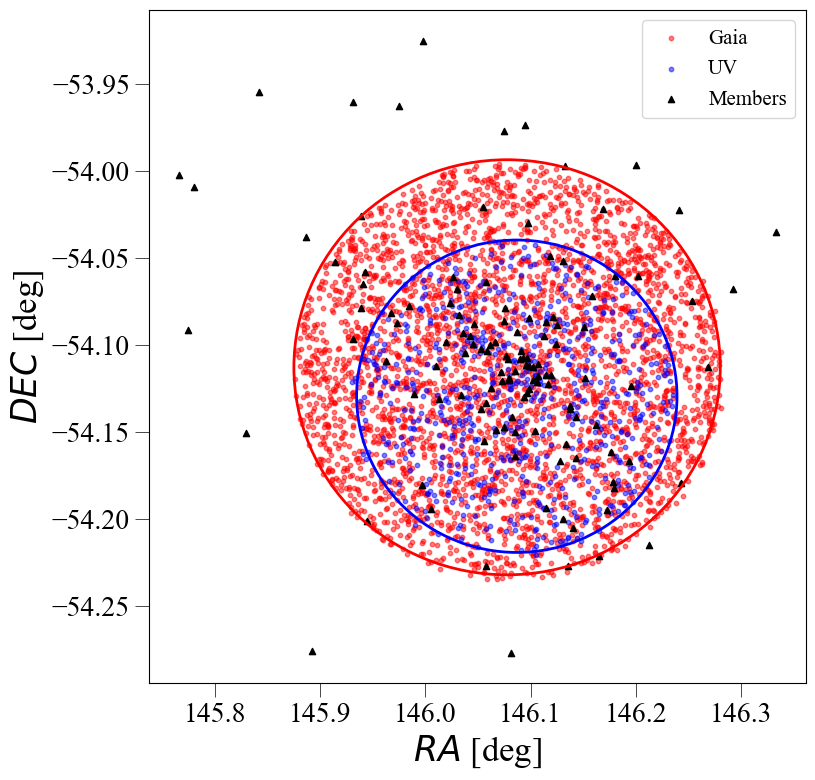

In [281]:
# Plotting RA-DEC positions 

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(8, 8))

# ax.title.set_fontsize(15)
ax.set_xlabel(r"$RA$ [deg]")
ax.xaxis.label.set_fontsize(25)
ax.set_ylabel(r"$DEC$ [deg]")
ax.yaxis.label.set_fontsize(25)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=20)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=20)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(gaia['ra'], gaia['dec'], color='red', s=10, alpha=0.5, label='Gaia')
ax.scatter(uv['ra'], uv['dec'], color='blue', s=10, alpha=0.5, label='UV')

ax.scatter(members_comb_filtered['ra'], members_comb_filtered['dec'], color='black', s=20, marker='^', label='Members')

ax.add_patch(Ellipse((center(gaia['ra'], gaia['dec'])), 2*radius(gaia['ra'], gaia['dec'])[0], 2*radius(gaia['ra'], gaia['dec'])[1], edgecolor='red', fc='None', lw=2))
ax.add_patch(Ellipse((center(uv['ra'], uv['dec'])), 2*radius(uv['ra'], uv['dec'])[0], 2*radius(uv['ra'], uv['dec'])[1], edgecolor='blue', fc='None', lw=2))

# mean_gaia_ra = gaia['ra'].mean()
# mean_gaia_dec = gaia['dec'].mean()

# ax.axvline(x=mean_gaia_ra, color='r', linestyle='--')
# ax.axhline(y=mean_gaia_dec, color='r', linestyle='--')

ax.legend(loc='upper right', fontsize=15)

plt.show() 

fig.savefig(f'plots/{cluster}/sky_coords.png', bbox_inches='tight')

In [282]:
gaia_mag = 'phot_g_mean_mag' # choosing filter for Gaia
# gaia_mag = 'phot_rp_mean_mag'

# Select only the columns 'id', 'ra', 'dec', and 'mag'
gaia_selected = gaia[['id', 'ra', 'dec', gaia_mag]]
gaia_selected.to_csv(f'data_output/{cluster}/gaia_sky.dat', sep='\t', index=False, header=False)

# Select only the columns 'id', 'ra', 'dec', and 'mag'
uv_selected = uv[['id', 'ra', 'dec', 'u']]
uv_selected.to_csv(f'data_output/{cluster}/uv_sky.dat', sep='\t', index=False, header=False)

In [283]:
# Changing coordinates from RA-DEC to x-y
os.system(f'project_coords data_output/{cluster}/gaia_sky.dat 1 2 {coords[0]} {coords[1]} asec outfile=data_output/{cluster}/gaia_cart.dat')
os.system(f'project_coords data_output/{cluster}/uv_sky.dat 1 2 {coords[0]} {coords[1]} asec outfile=data_output/{cluster}/uv_cart.dat')

0

In [284]:
# Importing datasets with new coordinates
gaia_cart = pd.read_csv(f'data_output/{cluster}/gaia_cart.dat', sep='\s+', header=None, names=['id', 'x', 'y', gaia_mag])
uv_cart = pd.read_csv(f'data_output/{cluster}/uv_cart.dat', sep='\s+', header=None, names=['id', 'x', 'y', 'u'])

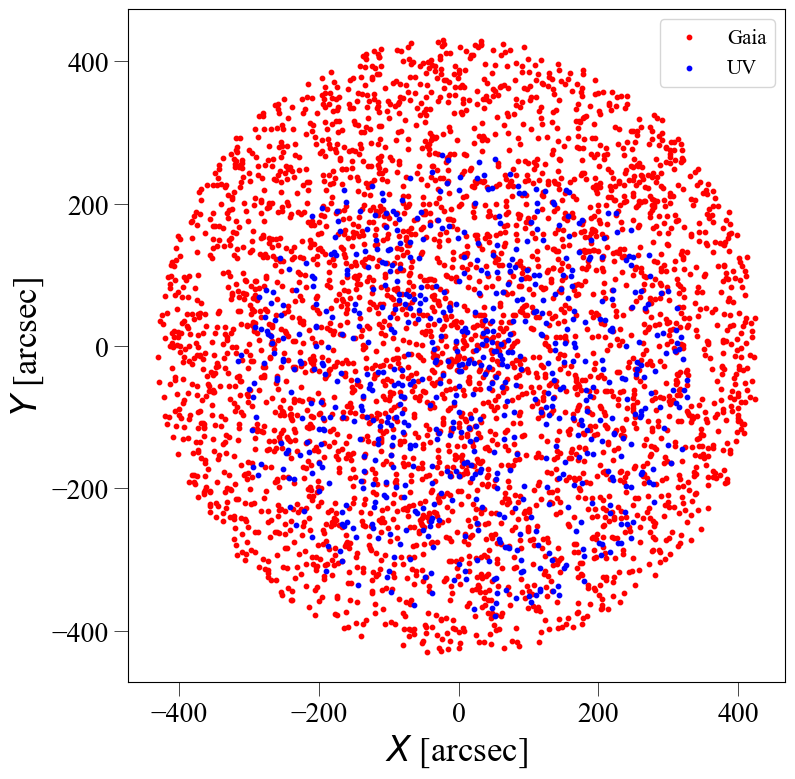

In [285]:
# Plotting X-Y positions
plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(8, 8))

# ax.title.set_fontsize(15)
ax.set_xlabel(r"$X$ [arcsec]")
ax.xaxis.label.set_fontsize(25)
ax.set_ylabel(r"$Y$ [arcsec]")
ax.yaxis.label.set_fontsize(25)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=20)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=20)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(gaia_cart['x'], gaia_cart['y'], color='red', s=10, label='Gaia')
ax.scatter(uv_cart['x'], uv_cart['y'], color='blue', s=10, label='UV')

ax.legend(loc='upper right', fontsize=15)

plt.show() 

fig.savefig(f'plots/{cluster}/cart_coords.png', bbox_inches='tight')

In [286]:
# Matching the datasets
#http://spiff.rit.edu/match/match-0.16/match.html

# parameters like: matchrad=3.0 trirad=0.001 nobj=40 recalc is changable and requares playing with them to get the best result

os.system(f'match data_output/{cluster}/gaia_cart.dat 1 2 3 data_output/{cluster}/uv_cart.dat 1 2 3 outfile=data_output/{cluster}/matched id1=0 id2=0 matchrad=5.0 trirad=0.001 nobj=40 recalc')

TRANS: a=1.506839594e+01 b=9.854166905e-01 c=1.120826054e-02 d=-7.191646602e+00 e=-1.131971695e-02 f=9.909301268e-01 sig=3.4003e-03 Nr=588 Nm=642 sx=4.8315e-02 sy=5.1179e-02 


0

In [287]:
# Importing matched datasets

gaia_matched = pd.read_csv(f'data_output/{cluster}/matched.mtA', sep='\s+', header=None, names=['id', 'x', 'y', gaia_mag])
uv_matched = pd.read_csv(f'data_output/{cluster}/matched.mtB', sep='\s+', header=None, names=['id', 'x', 'y', 'u'])

gaia_unmatched = pd.read_csv(f'data_output/{cluster}/matched.unA', sep='\s+', header=None, names=['id', 'x', 'y', gaia_mag])
uv_unmatched = pd.read_csv(f'data_output/{cluster}/matched.unB', sep='\s+', header=None, names=['id', 'x', 'y', 'u'])

In [288]:
# List of columns to add
columns_to_add = ['SOURCE_ID', 'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'bp_rp', 'ra', 'dec']

# Remove the column represented by the variable gaia_mag
gaia_matched = gaia_matched.drop(columns=gaia_mag)

# Merge the dataframes on the 'id' column
gaia_matched = pd.merge(gaia_matched, gaia[['id'] + columns_to_add], on='id')
gaia_matched

,id,x,y,SOURCE_ID,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,ra,dec
0,1107,326.149345,-70.895712,5309184794605856128,15.285814,15.687677,14.667129,1.020549,146.230090,-54.132160
1,1108,321.902572,-61.470659,5309184794605857152,15.973579,16.374556,15.366053,1.008503,146.227987,-54.129535
2,1116,315.116009,-3.656722,5309184794605864064,17.111992,17.618706,16.450228,1.168478,146.224351,-54.113357
3,1073,311.175431,-79.974960,5309184691532492288,16.757858,17.302940,16.061943,1.240997,146.222945,-54.134762
4,2347,309.061488,-7.453442,5309187749543362560,13.971765,14.198249,13.595833,0.602416,146.221465,-54.114444
...,...,...,...,...,...,...,...,...,...,...
637,1697,117.707093,16.633853,5309186478232894336,14.932285,15.181817,14.493371,0.688446,146.129316,-54.108382
638,2691,225.536115,186.265668,5309188505457485184,13.937593,14.170198,13.542500,0.627698,146.180119,-54.060458
639,1258,116.955813,-341.640931,5309185550500546304,15.721245,16.049036,14.932290,1.116746,146.131026,-54.208802
640,3206,-189.064929,-316.605824,5308811235531633024,14.440206,14.803876,13.884714,0.919162,145.983422,-54.202742


In [289]:
uv_matched = pd.concat([uv_matched, gaia_matched['SOURCE_ID']], axis=1)

uv_matched['u-bp'] = uv_matched['u'] - gaia_matched['phot_bp_mean_mag'] # calculating u-bp color

uv_matched

,id,x,y,u,SOURCE_ID,u-bp
0,1,326.24470,-70.91688,18.364,5309184794605856128,2.676323
1,2,321.98355,-61.43959,19.088,5309184794605857152,2.713444
2,3,315.18718,-3.60887,20.435,5309184794605864064,2.816294
3,4,311.31401,-79.95700,20.318,5309184691532492288,3.015060
4,5,309.14436,-7.41224,16.459,5309187749543362560,2.260751
...,...,...,...,...,...,...
637,655,117.65437,16.62163,17.703,5309186478232894336,2.521183
638,657,225.60415,186.34584,16.491,5309188505457485184,2.320802
639,658,117.01397,-341.72235,18.964,5309185550500546304,2.914964
640,661,-189.09015,-316.63244,17.309,5308811235531633024,2.505124


In [290]:
mask = gaia_matched['SOURCE_ID'].isin(members_comb_filtered['SOURCE_ID'])
gaia_filtered = gaia_matched[mask]

# mask = gaia['SOURCE_ID'].isin(members_comb_filtered['SOURCE_ID'])
# gaia_filtered = gaia[mask]

gaia_filtered   

,id,x,y,SOURCE_ID,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,ra,dec
20,930,216.783861,-235.116436,5309183145338379648,13.010625,13.280972,12.567144,0.713828,146.178484,-54.178594
28,1546,183.460781,-118.225191,5309186203355103872,16.818321,17.366692,16.126740,1.239952,146.161735,-54.145951
40,2404,163.371018,-21.280973,5309187886982295936,15.270689,15.584049,14.785785,0.798265,146.151494,-54.118850
41,2453,162.605659,83.623770,5309187990061394560,13.324804,13.582430,12.898967,0.683463,146.150505,-54.089450
69,1680,90.013308,-32.297970,5309186443873146496,12.819293,13.093982,12.374661,0.719320,146.116280,-54.122190
...,...,...,...,...,...,...,...,...,...,...
598,2084,70.532743,8.028599,5309187234147132928,15.053795,15.405406,14.523428,0.881978,146.106684,-54.110953
602,2043,-2.110281,-6.795297,5309187165427643136,15.183943,15.386698,14.549029,0.837668,146.071838,-54.115344
603,2109,-13.844055,55.272218,5309187268506866432,15.486971,15.867681,14.862923,1.004758,146.065864,-54.097985
622,2434,108.203603,48.023297,5309187955701646592,16.944227,17.419678,16.216686,1.202991,146.124567,-54.099616


In [291]:
mask = uv_matched['SOURCE_ID'].isin(members_comb_filtered['SOURCE_ID'])
uv_filtered = uv_matched[mask]

uv_filtered['u-bp'] = uv_filtered['u'] - gaia_matched['phot_bp_mean_mag'] # calculating u-bp color

uv_filtered

/tmp/ipykernel_2082/3977560781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uv_filtered['u-bp'] = uv_filtered['u'] - gaia_matched['phot_bp_mean_mag'] # calculating u-bp color


,id,x,y,u,SOURCE_ID,u-bp
20,21,216.83530,-235.16602,15.713,5309183145338379648,2.432028
28,29,183.45940,-118.22892,20.177,5309186203355103872,2.810308
40,41,163.34511,-21.29342,18.245,5309187886982295936,2.660951
41,42,162.59435,83.64750,15.901,5309187990061394560,2.318570
69,70,89.97873,-32.28314,15.537,5309186443873146496,2.443018
...,...,...,...,...,...,...
598,614,70.48304,8.04736,18.103,5309187234147132928,2.697594
602,618,-2.15226,-6.84002,18.076,5309187165427643136,2.689302
603,619,-13.84775,55.22336,18.589,5309187268506866432,2.721319
622,638,108.11708,48.09285,20.237,5309187955701646592,2.817322


In [292]:
np.savetxt(f'data_saved/{cluster}/gaia_matched.txt', gaia_matched, fmt='%.6f', delimiter='\t', header='gaia_matched')
np.savetxt(f'data_saved/{cluster}/uv_matched.txt', uv_matched, fmt='%.6f', delimiter='\t', header='uv_matched')
np.savetxt(f'data_saved/{cluster}/gaia_filtered.txt', gaia_filtered, fmt='%.6f', delimiter='\t', header='gaia_filtered')
np.savetxt(f'data_saved/{cluster}/uv_filtered.txt', uv_filtered, fmt='%.6f', delimiter='\t', header='uv_filtered')

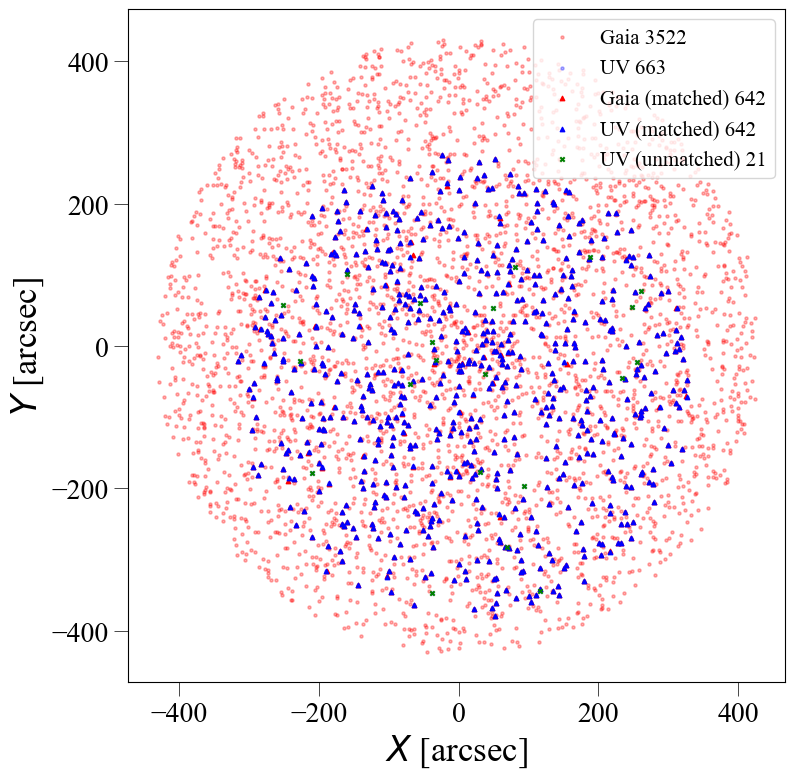

In [293]:
# Plotting X-Y positions of matched stars

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(8, 8))

# ax.title.set_fontsize(15)
ax.set_xlabel(r"$X$ [arcsec]")
ax.xaxis.label.set_fontsize(25)
ax.set_ylabel(r"$Y$ [arcsec]")
ax.yaxis.label.set_fontsize(25)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=20)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=20)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(gaia_cart['x'], gaia_cart['y'], color='red', s=5, label=f'Gaia {len(gaia_cart)}', alpha=0.3)
ax.scatter(uv_cart['x'], uv_cart['y'], color='blue', s=5, label=f'UV {len(uv_cart)}', alpha=0.3)

ax.scatter(gaia_matched['x'], gaia_matched['y'], color='red', s=10, marker='^', label=f'Gaia (matched) {len(gaia_matched)}')
ax.scatter(uv_matched['x'], uv_matched['y'], color='blue', s=10, marker='^', label=f'UV (matched) {len(uv_matched)}')

# ax.scatter(gaia_unmatched['x'], gaia_unmatched['y'], color='red', s=10, marker='x', label=f'Gaia (unmatched) {len(gaia_unmatched)}')
ax.scatter(uv_unmatched['x'], uv_unmatched['y'], color='green', s=10, marker='x', label=f'UV (unmatched) {len(uv_unmatched)}')

ax.legend(loc='upper right', fontsize=15)

plt.show() 

fig.savefig(f'plots/{cluster}/cart_coords_matched.png', bbox_inches='tight')

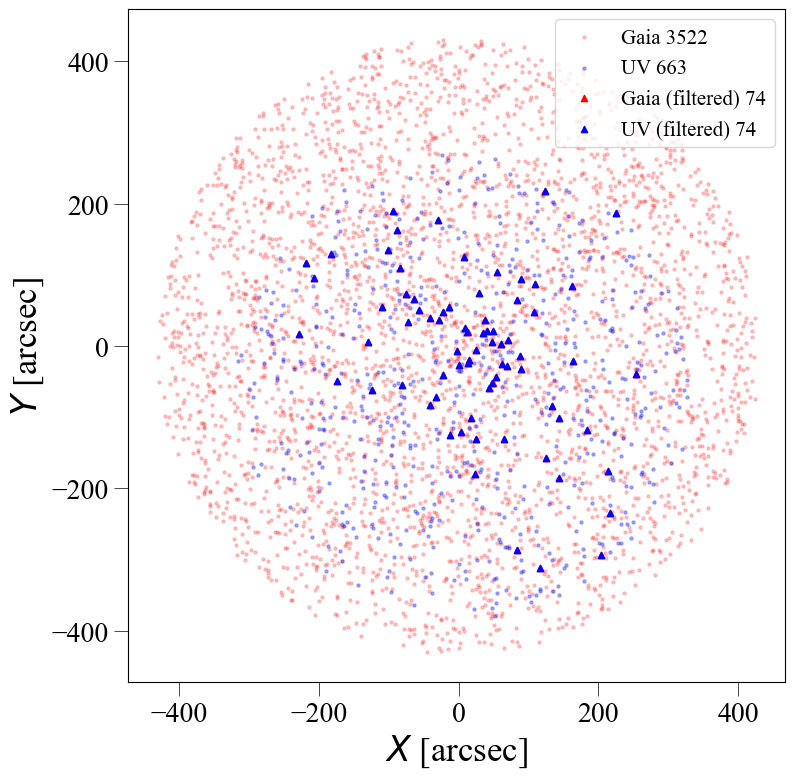

In [294]:
# Plotting X-Y positions of matched stars

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(8, 8))

# ax.title.set_fontsize(15)
ax.set_xlabel(r"$X$ [arcsec]")
ax.xaxis.label.set_fontsize(25)
ax.set_ylabel(r"$Y$ [arcsec]")
ax.yaxis.label.set_fontsize(25)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=20)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=20)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(gaia_cart['x'], gaia_cart['y'], color='red', s=5, label=f'Gaia {len(gaia_cart)}', alpha=0.2)
ax.scatter(uv_cart['x'], uv_cart['y'], color='blue', s=5, label=f'UV {len(uv_cart)}', alpha=0.3)

ax.scatter(gaia_filtered['x'], gaia_filtered['y'], color='red', s=20, marker='^', label=f'Gaia (filtered) {len(gaia_filtered)}')
ax.scatter(uv_filtered['x'], uv_filtered['y'], color='blue', s=20, marker='^', label=f'UV (filtered) {len(uv_filtered)}')

ax.legend(loc='upper right', fontsize=15)

plt.show() 

fig.savefig(f'plots/{cluster}/cart_coords_matched.png', bbox_inches='tight')

In [295]:
# Fitting MS
coeffs = np.polyfit(main_sequence_1['BP-RP'], main_sequence_1['U-BP'], 6)
poly = np.poly1d(coeffs)
ms_fit = poly(main_sequence_1['BP-RP'])


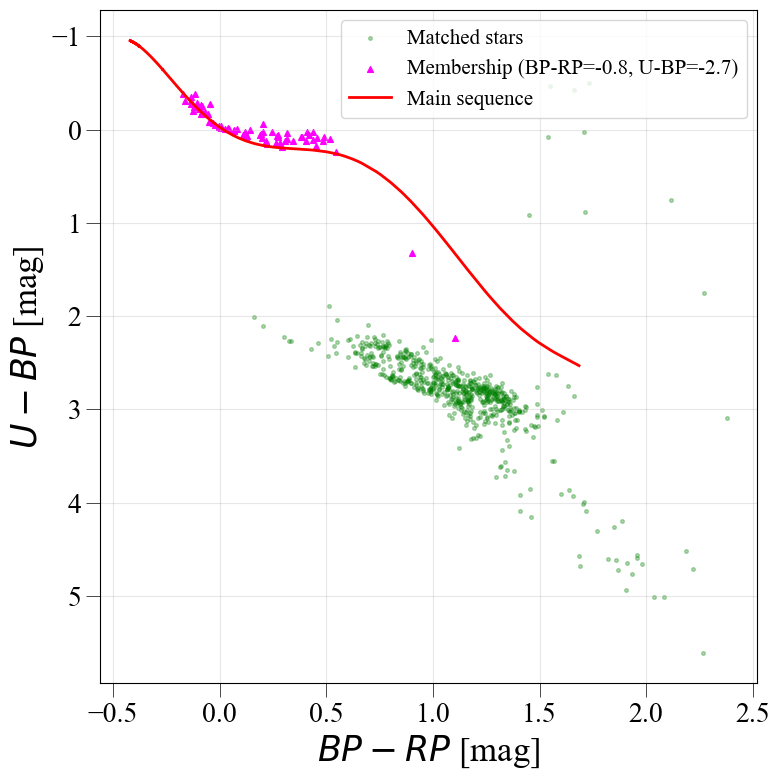

In [296]:
# Plotting colour-colour diagram

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(8, 8))

# ax.title.set_fontsize(15)
ax.set_xlabel(r"$BP-RP$ [mag]")
ax.xaxis.label.set_fontsize(25)
ax.set_ylabel(r"$U-BP$ [mag]")
ax.yaxis.label.set_fontsize(25)
ax.invert_yaxis()
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=20)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=20)
# plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()  

x = -0.8
y = -2.7

ax.scatter(gaia_matched['bp_rp'], uv_matched['u-bp'], color='green', s=7, alpha=0.3, label='Matched stars')
ax.scatter(gaia_filtered ['bp_rp']+x, uv_filtered ['u-bp']+y, color='magenta', s=17, marker='^', label=f'Membership (BP-RP={x}, U-BP={y})')
# ax.scatter(main_sequence_1['BP-RP'], main_sequence_1['U-BP'], color='red', s=15, label='Main sequence')
ax.plot(main_sequence_1['BP-RP'], ms_fit, color='red', linewidth=2, label='Main sequence')
ax.legend(loc='upper right', fontsize=15)


plt.show() 

fig.savefig(f'plots/{cluster}/BP-RP_U-BP_MS.png', bbox_inches='tight')